# Restricted Boltzmann Machines

This code is based on this [repository](https://github.com/lane203j/deep-autoencoder-with-RBM-pretraining). 

We will apply the RBM in order to reconstruct MNIST images.

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

%load_ext autoreload
%autoreload 2

import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import np_utils
import seaborn as sns
import os


from Models import RBM_TF

# Change figure aesthetics
%matplotlib inline
sns.set_context('paper', font_scale=1.2, rc={'lines.linewidth': 1.5})

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

Using TensorFlow backend.


Loading the dataset

In [2]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32').reshape((60000,784)).T / 255.
x_test = x_test.astype('float32').reshape((10000,784)).T / 255.

The input of the RBM is binary, therefore we need to make the MNIST dataset binary.

In [3]:
threshold = 0.0705
x_train_bw = (x_train > threshold).astype(int)
x_test_bw = (x_test > threshold).astype(int)

Let's show the Black and White Side by Side

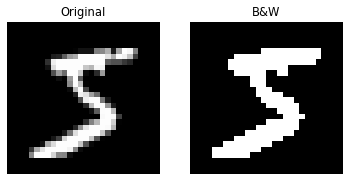

In [4]:
f, ax = plt.subplots(1,2, sharex=True)
ax[0].imshow(x_train[:,0].reshape((28,28)), cmap=plt.cm.gray);
ax[0].axis('off');
ax[0].set_title("Original");

ax[1].imshow(x_train_bw[:,0].reshape((28,28)), cmap=plt.cm.gray);
ax[1].axis('off');
ax[1].set_title("B&W");

# Training the RBM

In [7]:
from Models.RBM_TF_2 import RBM, RBM_Linear
model = RBM_Linear(784,100)

In [25]:
W, A, B = model.get_weights()

In [17]:
epochs = 1
history = model.train(x_train.T,n_epoches=epochs)

Epoch: 0
100%|██████████| 6000/6000 [00:28<00:00, 208.17it/s]Train error: 0.0627




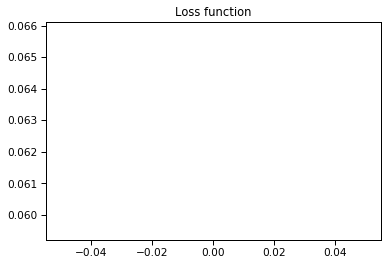

In [19]:
plt.title('Loss function')
plt.plot(range(len(history)),history);

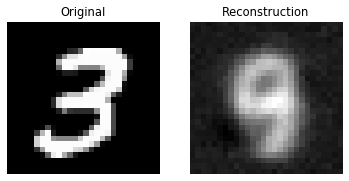

In [44]:
Reconstrutction = model.reconstruct(x_test.T)
index = 7

f, ax = plt.subplots(1,2, sharex=True)
ax[0].imshow(x_train[:,index].reshape((28,28)), cmap=plt.cm.gray);
ax[0].axis('off');
ax[0].set_title("Original");

ax[1].imshow(Reconstrutction[index].reshape((28,28)), cmap=plt.cm.gray);
ax[1].axis('off');
ax[1].set_title("Reconstruction");

## Saving the Model's weights

In [6]:
path_dir = 'run/RBM/'
run_id = '0001'
model.save_weights(filename=path_dir,name=run_id)

W0323 17:29:59.661513 140116696414016 deprecation_wrapper.py:119] From /home/nahum/Documents/VAE-RBM-Pretraining/Models/RBM_TF.py:198: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.



'run/RBM/'

In [7]:
model.load_weights(path_dir,run_id)

W0323 17:30:34.633313 140116696414016 deprecation.py:323] From /home/nahum/anaconda3/envs/generative/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
